<font color = 'yellow'>++++++==========================================================================================++++</font>
<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> ORIENTED OBJECT DETECTION</h2>
</div>
 <font color = 'yellow'>++++++==========================================================================================++++</font>

 # <font color = green> MACHINE LEARNING | SVM </font>

# Factors Affecting the Model's Accuracy in My Case:

**Feature Representation:** In the simplified code provided earlier, we used Histogram of Oriented Gradients (HOG) features,
    which might not be the best choice for all types of images and objects. 
  * HOG features are particularly effective for detecting object shapes and edges, 
    but they may not capture all relevant information for your specific images. 
    Choosing more appropriate features or deep learning techniques like convolutional neural networks (CNNs) could improve accuracy.

**Data Variation:** The quality and diversity of your provided  dataset play a significant role in model performance.
    If your dataset contains images with varying lighting conditions, scales, angles, or object orientations, 
    the model may struggle to generalize. Augmenting the dataset with variations of the same object or collecting more diverse data can help.

**Hyperparameter Tuning:** The SVM classifier's hyperparameters, such as the choice of kernel and regularization strength (C), 
    can impact performance. Tuning these hyperparameters through techniques like grid search or random search might lead to better results.

**Data Split:** The way i split your data into training and testing sets can also affect accuracy. 
   My data split is representative of the entire dataset and that the testing set contains a good mix of both object and non-object samples

# Other Factors Affecting Model Performance in General:

**Data Quality:** High-quality, well-labeled data is essential for training accurate models. Noisy or mislabeled data can significantly impact performance.

**Model Complexity:** The complexity of the chosen model can affect performance. Overly complex models may overfit the training data, while overly simple models may underfit. Finding the right balance is crucial.

**Feature Engineering:** Selecting the right features or representations of the data is critical. In some cases, deep learning models can automatically learn useful features, but in others, careful feature engineering is necessary.

**Regularization:** Applying regularization techniques, such as L1 or L2 regularization, can help prevent overfitting and improve generalization.

**Data Size:** Larger datasets tend to lead to better model performance. With more data, models can learn more robust patterns and generalize better to unseen examples.

**Model Architecture:** The choice of model architecture is crucial. For image-related tasks, CNNs have shown excellent performance. Different architectures and pre-trained models might be more suitable for specific tasks.

**Hyperparameter Tuning:** Tuning hyperparameters like learning rates, batch sizes, and dropout rates can significantly affect deep learning model performance.

**Data Preprocessing:** Proper preprocessing steps, such as normalization, data augmentation, and handling missing data, are essential to ensure data is in a suitable format for training.

**Class Imbalance:** In situations where there is a significant class imbalance, where one class has much fewer samples than the other, accuracy may not be an appropriate metric. Precision, recall, and F1-score are often used in such cases

# Understanding SVM Usages

- Hyperparameters in svm
Support Vector Machines (SVMs) are a type of supervised machine learning algorithm used for classification and regression tasks. - Hyperparameters are parameters that are not learned from the data during training but are set before the training process begins. Tuning these hyperparameters can significantly affect the performance of an SVM model. Here are some important hyperparameters in SVM:

- Kernel: SVMs can use different kernel functions to transform the input data into a higher-dimensional space. Common kernel functions include:

- Linear Kernel (kernel='linear'): Suitable for linearly separable data. Polynomial Kernel (kernel='poly'): Suitable for data with polynomial decision boundaries.

- Radial Basis Function (RBF) Kernel (kernel='rbf' or Gaussian Kernel): Suitable for non-linear data with no prior knowledge about the data distribution.

- C (Regularization Parameter): The regularization parameter C controls the trade-off between maximizing the margin and minimizing classification error. A smaller C value encourages a larger margin but may allow some misclassifications, while a larger C value aims to minimize misclassifications at the expense of a smaller margin. You often need to tune this parameter through techniques like cross-validation to find the right balance.

- Gamma (for RBF Kernel): The gamma parameter (gamma) defines how far the influence of a single training example reaches. A small gamma value means a large influence, and a large gamma value means a more localized influence. High gamma values can lead to overfitting, while low values can lead to underfitting. It needs to be tuned along with C for RBF kernels.

- Degree (for Polynomial Kernel): The degree parameter determines the degree of the polynomial kernel function. It is used when kernel='poly'. Higher degrees allow the model to fit more complex data but can also lead to overfitting.

In [23]:
# !pip install tensorflow opencv-python


In [51]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List of file paths to your 10 images
image_paths =["C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car1.jpg",
               "C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car10.jpg",
               "C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car12.jpg",
               "C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car13.jpg",
               "C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car14.jpg",
               "C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car2.jpg",
               "C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car3.jpg",
               "C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car4.jpg",
               "C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car6.jpg",
               "C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car7.jpg",
               "C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car8.jpg",
               "C:/Users/madhu/OneDrive/Desktop/company task_26/ML task/ML task dataset/car9.jpg"]




### image processing test,  please visit code blow this just test

In [53]:

# Function to load and preprocess an image
def preprocess_image(image_path, target_size=(224, 224)):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to the target size (e.g., 224x224 pixels)
    resized_image = cv2.resize(gray_image, target_size)

    
    # Normalize pixel values to the range [0, 1]
    normalized_image = resized_image / 255.0

    return normalized_image




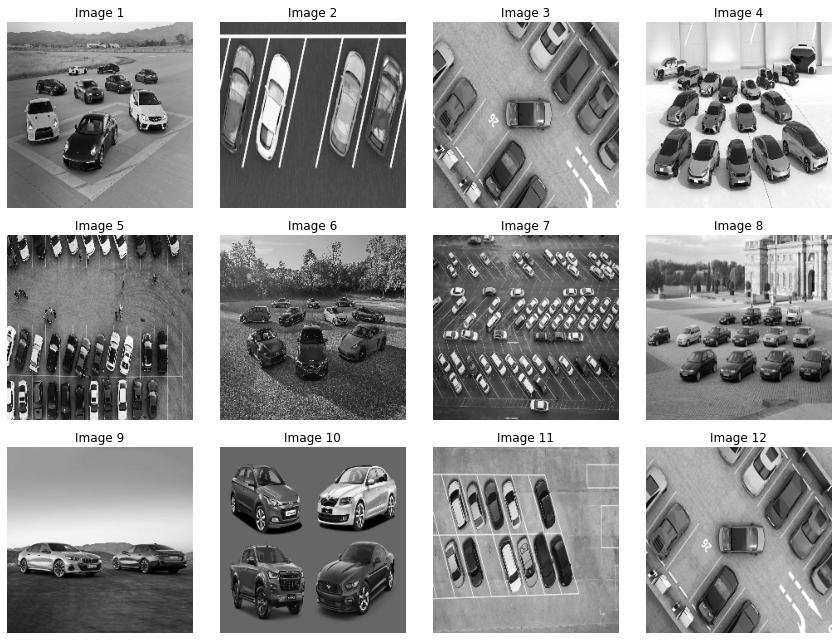

In [52]:
# Create a figure for displaying images
fig = plt.figure(figsize=(12, 9))  # Adjust figure size as needed

# Loop through the image paths and preprocess each image
for i, image_path in enumerate(image_paths):
    preprocessed_image = preprocess_image(image_path)
    
    # Create a subplot for each image (1-indexed)
    subplot_number = i + 1
    
    # Adjust the grid layout for 3 rows and 4 columns
    rows, cols = 3, 4
    
    ax = fig.add_subplot(rows, cols, subplot_number)
    
    # Display the preprocessed image
    ax.imshow(preprocessed_image, cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [38]:

import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
# Function to load and preprocess an image
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, target_size)
    return resized_image

In [40]:
# Function to extract HOG features from an image
def extract_hog_features(image):
    hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
    return hog_features


In [41]:
# Create lists to store preprocessed images and labels
X = []
y = []


In [42]:
# Assign labels based on your criteria 
for i, image_path in enumerate(image_paths):
    preprocessed_image = preprocess_image(image_path)
    hog_features = extract_hog_features(preprocessed_image)
    X.append(hog_features)
    if i < 5:
        y.append(1)  # Object present
    else:
        y.append(0)  # Object not present


In [43]:

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:

# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear', C = 1.0)


In [46]:

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [47]:
# Predict labels for the test data
y_pred = svm_classifier.predict(X_test)


In [49]:

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 66.67%


### let's try with the different Hyperparameter Tunning

In [66]:
# Create 2nd SVM classifier by changing kernal
svm_classifier_rbf = svm.SVC(kernel='rbf', C = 1.0)


In [67]:

# Train the SVM classifier
svm_classifier_rbf.fit(X_train, y_train)

SVC()

In [68]:
# Predict labels for the test data
y_pred_1 = svm_classifier_rbf.predict(X_test)


In [69]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_1)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 66.67%


### let's play with C values

In [71]:
# Create 2nd SVM classifier by changing kernal
svm_classifier_rbf = svm.SVC(kernel='linear', C = 0.70)


In [72]:

# Train the SVM classifier
svm_classifier_rbf.fit(X_train, y_train)

SVC(C=0.7, kernel='linear')

In [73]:
# Predict labels for the test data
y_pred_1 = svm_classifier_rbf.predict(X_test)


In [74]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_1)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 66.67%


# Cross Validation 

In [55]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [56]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [57]:
scores = cross_val_score(svm_classifier, X, y, cv=kfold, scoring='accuracy')


In [58]:
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Standard Deviation of Accuracy: {std_accuracy * 100:.2f}%")


Mean Accuracy: 56.67%
Standard Deviation of Accuracy: 8.16%


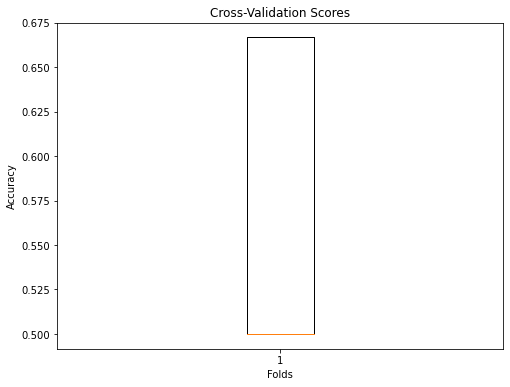

In [59]:
# Create a box plot of cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.show()

# Obeservation of learning rate using Visualization

In [62]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=kfold)


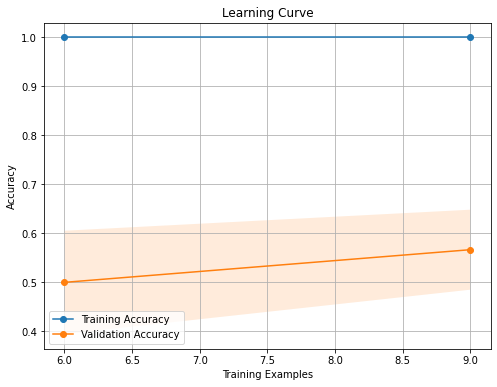

In [63]:

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, marker='o', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15)
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()
